In [ ]:
import sys
import numpy as np
import cv2

filename_list = ['space_shuttle.jpg','beagle.jpg', 'cup.jpg',
                 'pineapple.jpg','scooter.jpg','space_shuttle.jpg'] 

img = cv2.imread(filename_list[0])
img_list = [cv2.imread(f) for f in filename_list]


if img is None:
    print('Image load failed!')
    exit()
    
# Load network

# 다운받은 caffe model 사용
net = cv2.dnn.readNet('bvlc_googlenet.caffemodel', 'deploy.prototxt')

if net.empty():
    print('Network load failed!')
    exit()
    
# Load class names
with open('classification_classes_ILSVRC2012.txt', 'rt') as f:
    classNames = f.read().rstrip('\n').split('\n')
    
    
for img in img_list:    
    # 미리 학습된 DNN모델을 활용
    inputBlob = cv2.dnn.blobFromImage(img, 1, (224, 224), (104, 117, 123))
    net.setInput(inputBlob, 'data')
    prob = net.forward()

    # Check results & Display

    out = prob.flatten()
    classId = np.argmax(out)
    confidence = out[classId]

    text = '%s (%4.2f%%)' % (classNames[classId], confidence * 100)
    cv2.putText(img, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 1, cv2.LINE_AA)

    cv2.imshow('img', img)
    cv2.waitKey()
    cv2.destroyAllWindows()

##### 6개의 사진에 대해, 아래와 같은 분류를 한 것을 볼 수 있다. 
- matplotlib은 RGB에서 'R'이 없는듯한..?
- 위 cv실행시켰을때와 색깔은 조금 차이가 있다. 

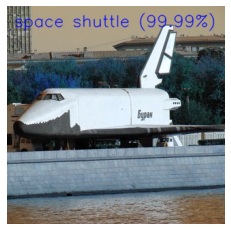

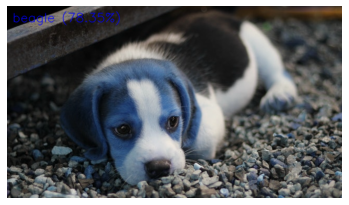

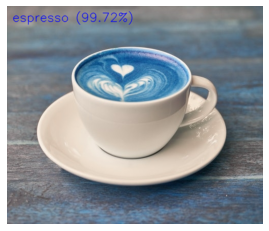

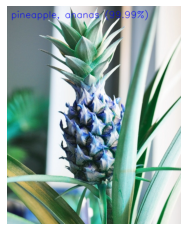

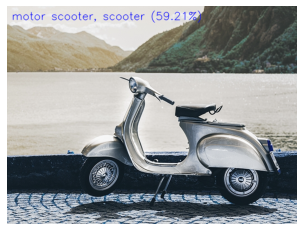

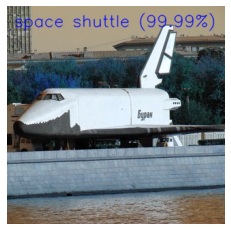

In [21]:
import matplotlib.pyplot as plt

for img in img_list:
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [10]:
print(len(classNames), '개 종류의 class 가 존재한다. ')

#class 예시 출력
print(classNames[:10])

1000 개 종류의 class 가 존재한다. 
['tench, Tinca tinca', 'goldfish, Carassius auratus', 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias', 'tiger shark, Galeocerdo cuvieri', 'hammerhead, hammerhead shark', 'electric ray, crampfish, numbfish, torpedo', 'stingray', 'cock', 'hen', 'ostrich, Struthio camelus']
